In [5]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns

from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

plt.style.use('dark_background')

In [6]:
pd.set_option('display.max_rows', 200)

In [7]:
df = pd.read_csv('../data/global_cia_combined.csv')

In [8]:
# extensive manual imputation, but I think it all holds up to common sense
# and I applied it consistently.  I welcome scrutiny for any mistakes.

part_dic = {"100s": 500, "1000s": 5000, "50": 50, "50+": 75, "100": 100,
            "1000": 1000, "10000": 10000, "200": 200, "2000": 2000,
            "thousands": 5000, "300": 300, "500": 500, "5000": 5000,
            "10000s": 50000, "hundreds": 500, "3000": 3000,
            "tens of thousands": 50000, "20000": 20000, "150": 150,
            "4000": 4000, "400": 400, "100000": 100000, "30000": 30000,
            "15000": 15000, "50000": 50000, "dozens": 48, "1500": 1500,
            "> 50": 75, "1000+": 1500, "6000": 6000, ">100": 150,
            "7000": 7000, "Thousands": 3000, "8000": 8000, "60": 60,
            "700": 700, "250": 250, ">1000": 1500, "600": 600,
            "Thousands": 3000, "25000": 25000, "40000": 40000,
            "Tens of thousands": 30000, "800": 800, "200000": 200000,
            "100000s": 300000, "70": 70, "2500": 2500, "10000+": 15000,
            "several thousand": 4000, "several hundred": 400,
            "hundreds of thousands": 300000, "60000": 60000, ">10000": 10000,
            "1000000": 1000000, "80": 80, "80000": 80000, "12000": 12000,
            "Hundreds": 300, "150000": 150000, "5000+": 5000, "70000": 70000,
            "300000": 300000, "2000+": 2000, ">5000": 6000, "500+": 500,
            "35000": 35000, ">300": 350, ">200": 250, "200+": 200,
            "500000": 500000, ">2000": 2500, "250000": 250000, "350": 350,
            ">3000": 3500, "10s": 50, "400000": 400000, "100000+": 100000,
            "14000": 14000, ">500": 600, "120": 120, "1300": 1300, "3500": 3500,
            "1200": 1200, "20000+": 20000, "> 10000": 10000, "3000+": 3000,
            "45000": 45000, "75": 75, ">30000": 30000, "13000": 13000,
            ">150": 150, "120000": 120000, "300+": 300, "18000": 18000,
            ">100000": 150000, "100s-1000s": 500, "600+": 650, "> 100000": 150000,
            ">50000": 60000, "800000": 800000, "16000": 16000, "350000": 350000,
            "900": 900, ">20000": 25000, "130": 130, ">400": 450, "9000": 9000,
            ">4000": 4500, "110000": 110000, ">15000": 17500,
            "400+": 400, "32000": 32000, "About 100": 100, "several hundreds": 400,
            "90000": 90000, "6000+": 6000, "1500+": 1500, "4500": 4500, "11000": 11000,
            "4000+": 4000, "700000": 700000, "170": 170, "700+": 700, "> 100": 150,
            "600000": 600000, "150+": 150, "1000000s": 3000000, "55000": 55000,
            "750000": 750000, "> 1000": 1000, "1100": 1100, "450": 450,
            "22000": 22000, "30000+": 30000, "200-300": 250,
            "hundreds of thousands": 300000, "180": 180, "scores": 60, ">250": 300,
            "Several thousand": 4000, "6500": 6500, "130000": 130000, "1500-2000": 1750,
            "55": 55, "> 3000": 3500, ">2500": 2750, "90": 90, "60+": 70,
            "> 200": 250, "17000": 17000, "240000": 240000, "280000": 280000,
            "27000": 27000, "1400": 1400, "24000": 24000, ">7000": 7500, "340": 340,
            "28000": 28000, "270": 270, ">1,000": 1500, ">700": 750, "several dozen": 48,
            "450000": 450000, "140": 140, "1700": 1700, "a few thousand": 3000,
            "1200000": 1200000, "Dozens": 36, ">300000": 350000, "> 5000": 6000,
            "66000": 66000, "<1000": 1500, ">500000": 600000, "About 200": 200,
            "5500": 5500, "> 500": 550, "more than 200": 250, ">1000000": 1500000,
            "9000+": 9000, "7500": 7500, "135000": 135000, "a few dozen": 36,
            "> 300000": 350000, "100s-10000s": 50000, "millions": 5000000,
            "> 20000": 25000, "<2000": 1500, "13000+": 13000, "61": 61,
            "Hundreds of thousands": 300000, "75000": 75000, "A few hundred": 300,
            "750": 750, "hundreds": 500, "a group": 50, "100s-1000": 500,
            "100s+": 500, ">170": 200, "3500-5000": 4000, ">5,000": 5500,
            "About 3,000": 3000, "125": 125, "100,000": 100000, "36000": 36000,
            ">600": 650, "2000000": 2000000, "Millions": 5000000, "33000": 33000,
            "<10000": 9000, "3600": 3600, "74": 74, ">150000": 160000, "260": 260,
            "100S": 500, "800+": 800, "hundreds": 500, "More than 100 people": 200,
            "10,000": 10000, "900000": 900000, "About 100 people": 100,
            "About 200 people": 200, "21000": 21000, ">2000000": 2500000,
            "3000000": 3000000, "> 400": 450, ">40000": 45000, "50 people": 50,
            ">350": 375, "1000s-10000s": 50000, "19000": 19000, "60-70": 65,
            "Hundreds of people": 500, "25000+": 25000, "15000+": 15000,
            "64+": 64, "few dozen": 36, "50000-70000": 60000, "> 30000": 35000,
            ">115": 120, "400-500": 450, "About 1000": 1000, "more than 50000": 55000,
            "> 2000": 2500, ">8000": 8500, "52000": 52000, "200,000": 200000,
            "160": 160, "<100": 90, "107": 107, "70+": 70, "61000": 61000,
            ">1100": 1200, ">80": 90, "Tens of thousands of people": 50000,
            "Thousands of people": 5000, "Crowds": 50, "102": 102, ">3100": 3200,
            "7000+": 7000, "1000s-10000": 5000, "72000": 72000, "more than 1000": 1500,
            "About 500": 500, ">35000": 37500, "<5000": 4500, "<200": 150, "115": 115,
            ">60": 65, ">6000": 6500, "50000+": 50000, "66": 66, "200000+": 200000,
            "100s-10000": 5000, "2050": 2050, "125000": 125000, "65": 65,
            ">1500": 1750, ">400000": 450000, "several dozens": 48, "2500+": 2500,
            "1000S": 5000, "500000+": 500000, "330": 330, "About 2,000 people": 2000,
            "84000": 84000, "57000": 57000, "Some 50 members": 50, "> 50000": 50000,
            "465000": 465000, "20000-40000": 30000, "10000s": 50000, "17000+": 17000,
            ">1600": 1700, "About 50": 50, "dozens arrested ": 2000000,
            "More than seven million people": 7500000, "207": 207, "7000-15000": 15000,
            "634": 634, "40": 40, "<70000": 70000, "13800": 13800, "93000": 93000,
            "At least 100": 100, "At least 10,000 people": 10000,
            "Between 11000 and 45000": 30000, ">3,000": 3500, "2,000 to 4,000 people": 3000,
            "> 3500": 3500, "about 8000": 8000, "50-99": 75, "More than 1,000 teachers": 1500,
            "4000-12000": 8000, ">50-1000": 500, "370": 370, "5600": 5600, "> 70": 80,
            "100000s-3000000": 250000, "50_": 50, "<15000": 14000, "About 10000": 10000,
            "126000": 126000, "57 former estate workers": 57, "650000": 650000, "About 120": 120,
            "240": 240, "680": 680, "86": 86, "2400+": 2400, "3300": 3300,
            "Nearly 700,000": 650000, ">440": 450, "51": 51, "25000-200000": 200000,
            ">80000": 85000, "About 30,000": 30000, "about 100": 100,
            "hundreds of thousands to 1.4 million": 900000, "Over 200 local protesters": 200,
            "14500": 14500, "> 9000": 9500, ">56": 57, "195": 195, "300-400": 350,
            "7000-9000": 8000, "137000": 137000, "up to two million": 2000000,
            "Over 3,000": 3500, "241": 241, "24000+": 24000,
            "March organiser and legal-sector lawmaker Dennis Kwok, said more than 2,000 people joined the protest. Police put the turnout at 1,700.": 1800,
            ">15,000": 16000, "128": 128, "340000": 340000, "5600+": 5600,
            "couple thousands": 2000, "840": 840, "Nearly 500": 450, "613": 613,
            "a few hundreds": 300, "About 6,000 people": 6000, "a few hundred": 300,
            "2450": 2450, "155": 155, "51000+": 51000, "About 12,000 protesters": 12000,
            "29000": 29000, "500-700": 600, "at least 500": 500, ">9000": 9500,
            "<375000": 380000, "52": 52, "35000 - 70000": 52500, "138": 138,
            "ABOUT 130 members": 130, "128000": 128000, "<1000000": 1200000,
            ">2900": 3000, "about 300": 300, "68000": 68000, "350+": 350, "About 300": 300,
            "5000-10000": 7500, "1 million": 1000000, ">70000": 75000,
            "Thousands of Indians, including Bollywood actors": 5000,
            "More than 10,000 citizens": 15000, "50s": 100, "3000-5000": 4000, "50-100": 75,
            "Around 200 protesters": 200, "at least 160000": 160000, "540": 540,
            "In northern Chiang Mai province, 200 kamnans and village heads; in Phetchaburi, about 400 kamnans and village heads": 600,
            "At least 10,000": 10000, "56000+": 56000, "15,000": 15000, ">18000": 19000,
            "Some 250 residents": 250, "4200": 4200, "btw. 20000 & 30000": 25000,
            "100s-500": 250, "few thousand": 3000, "Estimated number of protesters at 10,000" : 10000,
            "2200+" : 2200, "More than 500,000 people" : 600000, "150-300" : 225, "1000-10000" : 6000,
            "187000" : 187000, "138000" : 138000, "63000" : 63000, "161" : 161, "920" : 920,
            "13,000 people" : 13000, "56000" : 56000, "132+" : 132, "69000" : 69000, "51+" : 52,
            "busloads" : 100, "Up to 300 people": 250, "71" : 71, "106" : 106, "3000-4000" : 3500,
            "65000" : 65000, "about 3000" : 3000, "a few hundred" : 300, "About 100 taxis" : 100, 
            "500-1000" : 750, "520+" : 520, "SOME 3,000 people" : 3000, "181" : 181, 
            "100-1500+" : 1000, "700 - >1000" : 850, "Estimated 6,000 drivers" : 6000,
            "615000" : 615000, "About 50 activists" : 50, "3000 to 5000" : 4000, "<500" : 550,
            "300-1000s" : 1000, "Some 5,000 members" : 5000, "407791" : 407791, ">340" : 350,
            "298" : 298, "> 70000" : 75000, "124000" : 124000, "Some 100 residents" : 100, 
            ">200000" : 250000, "20000s" : 60000, "About 300 people" : 300, "Nearly 70 parents" : 70,
            "1500-10000" : 6000, "112" : 112, "Some 100 demonstrators" : 100, "< 100000" : 90000,
            "About 80" : 80, "More than 10,000 protesters" : 15000, "73" : 73, "800-900" : 850,
            "3000-6000" : 4500, "170000" : 170000, ">224" : 225, "<20000" : 25000, "88" : 88,
            "141" : 141, "34000" : 34000, "600-700" : 650, "1600" : 1600, "More than 1 000" : 1500,
            "200-3000" : 1600, "6000-8000" : 7000, "2,000 to 3,000" : 2500, 
            "Several thousand protesters" : 4000, "567+" : 567, ">250-300" : 300, ">370" : 380,
            "200-400" : 300, "150-200" : 175, "20000-30000" : 25000, "Over 100" : 150, 
            "10300" : 10300, "About 300 protesters" : 300, ">16000" : 16500, "2700" : 2700,
            "50000-80000" : 65000, "> 700" : 750, "Hundreds of Venezuelans" : 500, 
            "> 150000" : 160000, "5000-50000" : 30000, "193" : 193, "About 100 villagers" : 100,
            "119500" : 119500, "About 4000" : 4000, "350-400" : 375, "> 800" : 850, "223000" : 223000,
            "8000-9000" : 8500, "Some 500 people" : 500, ">459" : 460,  
            "As many as 25,000 protesters" : 25000, ">3,000" : 3500, "<300" : 350, "234" : 234,
            "more than 25000" : 26000, "23000+" : 23000, "> 40000" : 45000, "2400" : 2400, 
            "HUNDREDS OF thousands of Venezuelans" : 500000, "> 500000" : 600000, "4800" : 4800, 
            "> 400000" : 450000, "28500" : 28500, "87" : 87, "118000" : 118000, "290000" : 290000,
            "3900" : 3900, "465" : 465, "53000" : 53000, "between 35,000 and 50,000" : 42500, 
            "6600" : 6600, "1300-2000" : 1650, "510000" : 510000, ">800" : 850, 
            "About 5,000 people" : 5000, "950" : 950, "23000" : 23000, "149" : 149, "500-600" : 550,
            ">5100" : 5200, "320000" : 320000, "3700" : 3700, "1100000" : 1100000,
            "100000-200000" : 150000, "300000+" : 300000, "Thousands of miners" : 5000,
            "About 7,000" : 7000, "58000+" : 58000, "500 people" : 500, "about 2000" : 2000, 
            "14059" : 14059, "About a hundred protesters" : 100, "1500000" : 1500000, "90+" : 90,
            "500+" : 500, "Up to 100,000" : 100000, "12000+" : 12000,  "more than 2000" : 2500,
            "280" : 280, "> 200000" : 250000, "400-600+" : 500, "8500" : 8500, "2000 to 3000" : 2500, 
            "130+" : 130, "over a million" : 1000000, "<50" : 40, "180000" : 180000,
            "Hundreds of youths" : 500, "29" : 29, "<6700" : 6500, "a few thousand" : 3000,
            ">37000" : 35000, ">213" : 225, "825000" : 825000, "<200000" : 180000, "260-500" : 380,
            "12500" : 12500, ">1200" : 1250, "500-1200" : 850, "54" : 54, "17200" : 17200, 
            "> 1500" : 1600, "2600" : 2600, "> 50 < 100" : 75, "Several hundred" : 400, "311" : 311, 
            "80-100" : 90, "About 500 people" : 500, "7000000" : 7000000, "1250" : 1250, 
            "44000" : 44000, "168000" : 168000, "> 15000" : 16000, "Estimated to be 15,500" : 15500,
            "430000+" : 430000, "50-60" : 55, "650" : 650,  "80+" : 80, "79" : 79, 
            "1100-10000s" : 6500, "More than 4,000 people" : 4500, "300s" : 1000, "around 50" : 50,
            "1800+" : 1800, "> 1300" : 1350, "22800" : 22800, "Hundreds of college students" : 500,
            "A general strike that paralysed Venezuela" : 5000000, "50000-100000" : 75000,
            "300-350" : 325, "230 families" : 1000, "1000s-23000" : 18000, "40000-80000" : 60000, 
            "very low thousands" : 2000, "Several hundred demonstrators" : 400,  "> 450" : 475, 
            "484000" : 484000, "27500" : 27500, "27500" : 27500, "< 1500" : 1600, "84" : 84,
            ">2600" : 2650, ">55" : 56, "41000" : 41000, "1600+" : 1600, "1000s-40000" : 25000,
            "500,000" : 500000, "25100+" : 25100, "several 1000s" : 4000, "325000" : 325000,
            "scores (>50)" : 60, "625000" : 625000, "more than 500" : 550, ">50-100s" : 300,
            "50000-120000" : 85000, "76" : 76, "300-500" : 400, "About 2,000" : 2000,
            ">130" : 135, "2000-3000" : 2500, "5300" : 5300, "5,000,000" : 5000000, 
            "The Civil Human Rights Front said 110,000 people; The Hong Kong police said about 20,000" : 110000,
            "600-3000" : 1800, "> 50" : 60, "20700+" : 20700, "140+" : 140, 
            "More than 300 people" : 350, "270000" : 270000, "between 100000 & 300000" : 200000,
            "<400000" : 450000, "About 150 protesters" : 150, "1150" : 1150, "200-2000+" : 1500,
            "75000-170000" : 130000, "157" : 157, "Around 5,000" : 5000, ">32200" : 32250, 
            "5750" : 5750, "About 500 demonstrators" : 500, "3800" : 3800, "559" : 559, 
            "More than 30,000" : 35000, "> 60000" : 65000, "185" : 185, "2000-200000" : 105000 , 
            "Almost 350,000" : 340000, "200000-400000" : 300000, ">351" : 352, "nearly 10000" : 9000,
            "More than 200 campaigners" : 250, "Hundreds of workers" : 500, "90000+" : 90000, 
            "3000-4500" : 3750, "1800" : 1800, "1,800 participants" : 1800, "102000" : 102000,
            "1300000" : 1300000, "20000-60000" : 40000, "140000" : 140000, "65,000 people" : 65000,
            "58000" : 58000, "250+" : 250, "Nearly 500 supporters" : 475, "3200+" : 3200, 
            "500-2000" : 1250, "3765" : 3765, "70000+" : 70000, "A few hundred people" : 300,
            "Hundreds of residents" : 500, "525000" : 525000, "<900" : 850, "> 42000" : 42500,
            "6000-7000" : 6500, "570000" : 570000, "About 4,000 people" : 4000, "51000" : 51000,
            "2850" : 2850, "30000-40000" : 35000, "210" : 210, "63" : 63, ">3500" : 3600, 
            "several hundred thousands" : 400000, "> 35000" : 36000, "several thousand" : 4000,
            "2300" : 2300, "250000-350000" : 300000, "Almost 200" : 190, "3500+" : 3500, 
            "Hundreds of villagers" : 500, "18500" : 18500, "100,000s" : 500000, "6000 to 8000" : 7000,
            ">60900" : 60950, "About 400" : 400, "1365+" : 1365, "5800" : 5800, "355" : 355, 
            "about 150": 150, "250-300" : 275, "1,000,000" : 1000000, "500000-700000" : 600000,
            "Over 2,000 construction workers" : 2500, "4700+" : 4700, "> 1000000" : 1500000, 
            "4360" : 4360, "between 7500-25000" : 17500, "3000-10000" : 6500, "more than 100" : 150,
            "2200" : 2200, "82000" : 82000, "10600" : 10600, "560000" : 560000, ">280" : 285, 
            "609" : 609, "335" : 335, "388" : 388, "> 80000" : 85000, "About 50 protesters" : 50,
            "Around 300 local people" : 300, "> 23000" : 23500, "Hundreds of student protesters" : 500,
            "22500" : 22500, "260000" : 260000, "89" : 89, "17500" : 17500, ">70" : 65, "1900" : 1900,
            "The organisers said more than 3,000 people; police said the turnout was 830 at its peak" : 2000,
            "1300+" : 1300, "850" : 850, ">222" : 223, "64" : 64, "> 25000" : 25500, 
            "1,000,000s" : 5000000, "300" : 300}


## CLEANING NOTES ##
#
# any string representing an integer was transferred as-is
# "About" interpreted as "exactly"
# any integer followed by a + was interpreted as that integer
# any indication of a range was interpreted as the median point of that range
# "Up to" rounded to a reasonable "one step down" value from the provided number
# "couple" interpreted as 2, "few" as 3, "several" as 4
# "hundreds", "thousands", and "millions" interpreted as 5, 
#
# ">" rounded up to halfway to the next significant digit contextual to the given value
# "<" rounded down likewise
#
# 
#
# "100s-10000s" notes revealed two of the three entries with this description
# numbered tens of thousands, the other was unspecified.  I imputed the same value used
# for "10000s" as a result.
#
# "100s-1000" both entries were described in notes as "hundreds" so that was the value imputed.
#
# "dozens arrested " for row 2047 says nothing about the number of protestors.  From the
# wikipedia article covering this protest, I learned that "Police said that about 33,000
# participated in the protests; pro-government organizers said 175,000 demonstrated" - the
# following protest, 2 days later, "Police estimated the number at 2.4 million and organizers
# at three million, with hundreds of thousands to over a million demonstrators in São Paulo,
# about 50,000 in Brasília and thousands in other cities" - based on this I will impute a
# value of 2 million, as this entry seems to cover both days of protest.
#
# The very similar but not identical entry "dozens arrested" refers to row 11176, a protest
# in Iran.  Articles on this subject:
#     - (https://theiranproject.com/blog/2016/02/12/cancellation-of-iran-oil-contracts-presentation-signals-infighting/, )
#     - (https://www.nytimes.com/2016/02/01/world/middleeast/iran-sanctions-oil-investment.html)
# suggest a protest of moderate size.  I am setting this one to a NaN to be filled later.


df['participants'] = df['participants'].map(part_dic)

# df['participants'].value_counts(normalize=True)

In [9]:
df['participants'].fillna(500, inplace=True)

In [10]:
numeric_cols = df[["year", "protest", "protestnumber", "startday", "startmonth", 
                   "startyear", "endday", "endmonth", "endyear", "protesterviolence", 
                   "ignore", "crowd dispersal", "arrests", "accomodation", "shootings", 
                   "beatings", "killings", "political behavior, process", "labor wage dispute",
                   "price increases, tax policy", "removal of politician", "police brutality",
                   "land farm issue", "social restrictions", "net_migration_per_1000_population", 
                   "age_0_14_percent", "age_15_24_percent", "age_25_54_percent", "age_55_64_percent", 
                   "age_65_over_percent", "gdp_purchasing_power_global_rank", "gdp_growth_global_rank",
                   "electricity_access_percent", "electricity_generating_capacity_global_rank", 
                   "internet_access_percent", "cell_phone_per_100"]]

category_cols = df[["country", "region", "location", "participants", "protesteridentity", 
                    "sources", "notes", "final", "climate", "natural_resources", 
                    "population_distribution", "language", "govt_type", "legal_system", 
                    "military_spending_annual_percent_gdp", "transnational_disputes"]]

In [11]:
# age_dic = {'age_0_14_percent' : 7, 'age_15_24_percent' : 19, 'age_25_54_percent' : 39, 
#            'age_55_64_percent' : 59: , 'age_65_over_percent' : 71}
df['mean_age'] = 0
for i in range(0, 15193):
    df['mean_age'][i] = ((df['age_0_14_percent'][i] / 100) * 7) + ((df['age_15_24_percent'][i] / 100) * 19) + ((df['age_25_54_percent'][i] / 100) * 39) + ((df['age_55_64_percent'][i] / 100) * 59)+ ((df['age_65_over_percent'][i] / 100) * 71)


# age_0_14_percent                               1211
# age_15_24_percent                              1211
# age_25_54_percent                              1211
# age_55_64_percent                              1211
# age_65_over_percent                            1211

<ipython-input-11-9f76121510ef>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['mean_age'][i] = ((df['age_0_14_percent'][i] / 100) * 7) + ((df['age_15_24_percent'][i] / 100) * 19) + ((df['age_25_54_percent'][i] / 100) * 39) + ((df['age_55_64_percent'][i] / 100) * 59)+ ((df['age_65_over_percent'][i] / 100) * 71)
C:\Users\catal\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [12]:
df['mean_age'].isnull().sum()

1211

In [13]:
df['mean_age'].fillna(df['mean_age'].mean(), inplace=True)

In [14]:
X = df.loc[:, ['mean_age', 'participants']]

In [15]:
ss = StandardScaler()
Xs = ss.fit_transform(X)

In [16]:
kmeans = KMeans(6, random_state=42, n_init=25, tol=0.001)
kmeans.fit(Xs)

KMeans(n_clusters=6, n_init=25, random_state=42, tol=0.001)

In [17]:
kmeans.cluster_centers_

array([[ 1.10349606e+00, -5.16793035e-02],
       [-1.30311064e+00, -9.44284024e-02],
       [-2.62581111e-02,  3.02132589e+01],
       [-1.71071532e-01, -6.14366393e-02],
       [ 4.94875697e-01,  3.94737758e+00],
       [ 5.40271841e-01,  1.44341154e+01]])

In [18]:
centroids = pd.DataFrame(
    ss.inverse_transform(kmeans.cluster_centers_),
    columns= ['mean_age', 'participants']
)
centroids

,mean_age,participants
0,39.457006,1.311051e+04
1,24.610261,5.430930e+03
2,32.487370,5.450000e+06
3,31.593993,1.135767e+04
4,35.702328,7.315138e+05
5,35.982385,2.615385e+06


In [19]:
df['cluster'] = kmeans.labels_

In [ ]:
plt.figure(figsize=(9,9));

## Plot scatter by cluster / color, and centroids
colors = ["red", "green", "blue", "yellow", "orange", "purple"]
df['color'] = df['cluster'].map(lambda p: colors[p])

ax = df.plot(
    kind="scatter", 
    x="mean_age", y="participants",
    figsize=(10,8),
    c = df['color'], 
    alpha=0.2,
    logy = True
)

centroids.plot(
    kind="scatter", 
    x="mean_age", y="participants", 
    marker="*", c=["r", "g", "b", "yellow", "orange", "purple"], s=550,
    ax=ax,
)

plt.xticks(range(20, 50, 5))
plt.title('Time Stretch transformed waveform')
;

In [21]:
dbscan = DBSCAN(eps = 5, min_samples=20)

dbscan.fit(Xs)

DBSCAN(eps=5, min_samples=20)

In [22]:
df['cluster'] = dbscan.labels_

In [23]:
# do not run this cell, it will take ~30m !
# png included in repo
# sns.pairplot(df, hue='cluster', 
#              hue_order=["red", "green", "yellow", "purple", "orange", "blue", "white", "grey"])

<AxesSubplot:xlabel='year', ylabel='participants'>

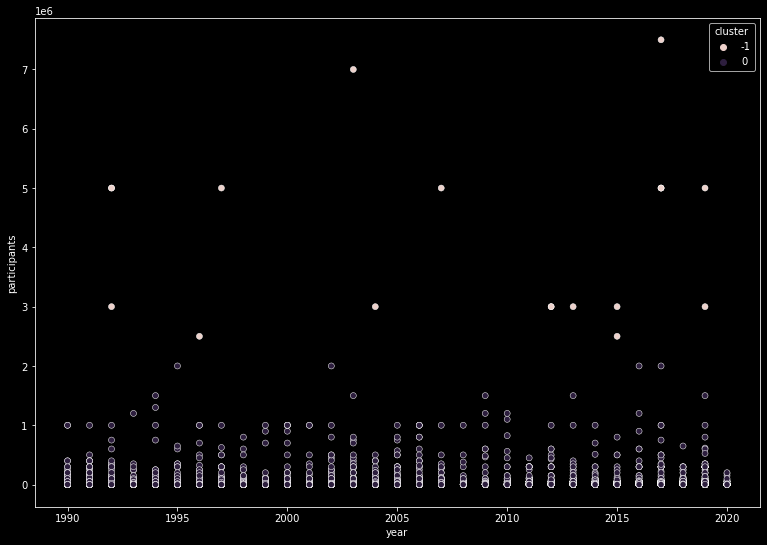

In [24]:
fig, ax = plt.subplots(figsize=(13,9))

sns.scatterplot(data=df, 
                x='year', 
                y='participants',
                hue='cluster',
                ax=ax,)

KeyboardInterrupt: 

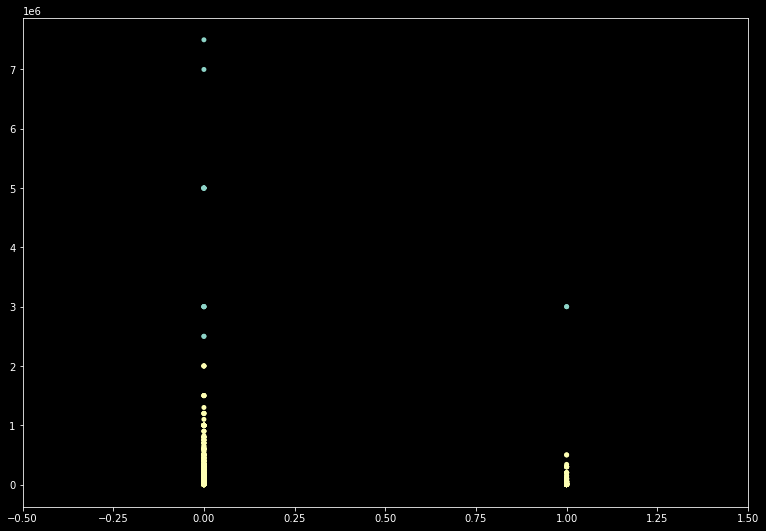

In [25]:
fig, ax = plt.subplots(figsize=(13,9))

sns.swarmplot(data=df, 
                x='social restrictions', 
                y='participants',
                hue='cluster',
                ax=ax)

In [ ]:
fig, ax = plt.subplots(figsize=(13,9))

sns.swarmplot(data=df, 
                x='police brutality', 
                y='participants',
                hue='cluster',
                ax=ax)

In [ ]:
df.columns